#  Classification : Nearest Neighbors and Naive Bayes 

## Classification using Nearest Neighbors

(a) Perform k-Nearest neighbours on the given dataset($X_{knn}$ and $y_{knn}$: where $X_{knn}$ stores feature vectors representing the movies and  $y_{knn}$ stores the 0-1 labelling for each movie) for binary classification of movies, for classifiying whether a given movie is a comedy(label 1) or not a comedy(label 0) . Split the dataset into train(80%), validation(10%) and test sets(10%).Run k-Nearest neighbours for different k values (1,3,7,15,31,63). Select the k, using validation set, which returns the best accuracy score. 

(i)  Report all the validation accuracies for all the values of k. 
<br>(ii) Report accuracy score by performing k-NN on the test dataset using the best chosen k value. 

In [1]:
## write your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [16]:
df1 = pd.read_csv("X_knn.csv", sep = ' ', header=None)
df2 = pd.read_csv("y_knn.csv", header=None)

In [21]:
# list_df = list(df1[0])
# split_col_list = [row.split() for row in list_df]
# for i, row in enumerate(split_col_list):
#     split_col_list[i] = [float(val) for val in split_col_list[i]]
    
#X = np.array(split_col_list)
X = np.array(df1)
y = np.array(df2)
y = y[:, 0]

In [22]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127
0,0.02500,0.02500,0.05775,0.09675,0.14675,0.21700,0.06700,0.26275,0.26200,0.03200,...,0.03950,0.01800,0.04575,0.03275,0.12500,0.04150,0.01925,0.03625,0.07775,0.02300
1,0.03975,0.04375,0.03775,0.04800,0.11025,0.07250,0.04775,0.10975,0.09925,0.02050,...,0.04175,0.01925,0.01725,0.02425,0.12550,0.02250,0.01550,0.01475,0.09025,0.01875
2,0.04350,0.05475,0.02800,0.07700,0.05400,0.06850,0.05600,0.18500,0.04925,0.02675,...,0.04150,0.02675,0.02775,0.03425,0.15550,0.03675,0.01700,0.01950,0.09700,0.01850
3,0.03725,0.03950,0.03675,0.03100,0.06825,0.04050,0.02325,0.08700,0.05125,0.03025,...,0.05750,0.03375,0.02275,0.03975,0.18525,0.05925,0.01500,0.01525,0.06450,0.01300
4,0.04200,0.05275,0.05925,0.03675,0.07525,0.12525,0.02850,0.08500,0.02950,0.02875,...,0.04250,0.02825,0.02150,0.02600,0.14275,0.02075,0.01650,0.01675,0.10750,0.01825


In [23]:
# Splitting Data into Training, Validation and Test sets
X_train, X_val, X_test = np.split(X, [int(.8 * len(X)), int(.9 * len(X))])
y_train, y_val, y_test = np.split(y, [int(.8 * len(y)), int(.9 * len(y))])

In [24]:
k_values = [1,3,7,15,31,63]
validation_accuracies = []
for k in k_values:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    y_val_pred = neigh.predict(X_val)
    validation_accuracies.append(accuracy_score(y_val, y_val_pred) * 100)

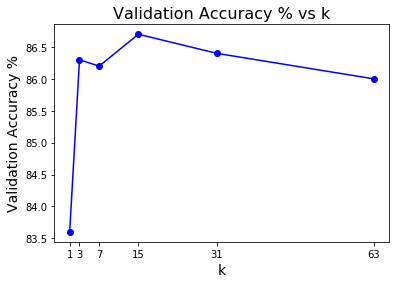

Validation Accuracy % for each value of K:


,K,Validation Accuracy %
0,1,83.6
1,3,86.3
2,7,86.2
3,15,86.7
4,31,86.4
5,63,86.0


In [25]:
plt.plot(k_values, validation_accuracies, 'bo-')
plt.xticks(k_values)
plt.title("Validation Accuracy % vs k", size=16)
plt.xlabel("k", size=14)
plt.ylabel("Validation Accuracy %", size=14)
plt.show()

print("Validation Accuracy % for each value of K:")
val_acc_dict = {"K": k_values, "Validation Accuracy %": validation_accuracies}
df_val_acc = pd.DataFrame(val_acc_dict)
df_val_acc

In [26]:
print("Value of K to get highest validation accuracy % =", k_values[validation_accuracies.index(max(validation_accuracies))])
print("Best Validation Accuracy = {}%".format(max(validation_accuracies)))

Value of K to get highest validation accuracy % = 15
Best Validation Accuracy = 86.7%


In [27]:
# Using the best value of k
neigh = KNeighborsClassifier(n_neighbors=15)
neigh.fit(X_train, y_train)
y_test_pred = neigh.predict(X_test)
acc = accuracy_score(y_test, y_test_pred)
print("Test accuracy = {}%".format(acc*100))

Test accuracy = 86.7%


k = 15 is the best value as it gives us maximum validation accuracy of 86.7%.
The test accuracy is 86.7%.

(b) State why using an even value of k in k-NN should not be chosen

To decide the class that a point belongs to, we calculate its distance from all the other points. Then we choose the "k" closest points, and whichever class **majority** of those points belong to, we assign the query point to that **majority class**. If k is even, then we might have a case where half of the k points belong to one class and the other half to the alternate class. Thus we will not have any clear majority, making it impossible to classify the query point.

## Learning Naive Bayes' classifier  

### From Continuous Distribution of data

Here, the distribution of the data( $X$ represents the datapoints and $Y$ represents the 0-1 binary-class label; where 0 being the negative class and 1 being the positive class) is already known.
<br>Consider the following one-dimensional(1-D) Gaussian distributions where means and variances are unknown. You need to estimate means($\mu_-$: for negative class and  $\mu_+$: for positive class) and variances ($\sigma^{2}_{-}$: for negative class and $\sigma^{2}_+$: for positive class) from the given data : 
<br> (1) Assume $X|Y_{Y=0} \sim \mathcal{N}(\mu_- , \sigma^{2}_-)$ 
<br>(2) Assume $X|Y_{Y=1} \sim \mathcal{N}(\mu_+ , \sigma^{2}_+)$


*Generating artificial datasets in the next cell *

In [9]:
## This cell is for generating datasets. Students should not change anything in this cell. 
## You can compare your mean and variance estimates by the actual ones used to generate these datasets

import numpy as np
X_pos = np.random.randn(1000,1)+np.array([[2.]])
X_neg = np.random.randn(1000,1)+np.array([[4.]])
X_train_pos = X_pos[:900]
X_train_neg = X_neg[:900]
X_test_pos = X_pos[900:]
X_test_neg = X_neg[900:]
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_train = np.concatenate(( np.ones(900),np.zeros(900) ))
Y_test = np.concatenate(( np.ones(100), np.zeros(100) ))

## X_train, X_test, Y_train, Y_test are your datasets to work with ####



<br>**Instructions to follow for learning a Baeysian classifier:** *(Code the formulae for estimating the different parameters yourself)*
<br> a)Utilize the training dataset to estimate the means($\hat{\mu_+}$,$\hat{\mu_-}$) and variances($\hat{\sigma^{2}_+}$, $\hat{\sigma^{2}_-}$) for both positive and negative classes  
b)Estimate the prior probability: $P(Y=1)$  ⟶ which could be referred to as: $\hat{a}$ 
<br>c)Estimate the classifier funtion/posterior probability:  $P(Y=1|X = x)$  ⟶ which could be referred to as $\hat{\eta(x)}$
<br>d)Find out the threshold value($x^*$) for classification by equating the estimated classifier function($\hat{\eta(x)}$)  with threshold probability of 0.5
<br>e)Classify the test dataset into the two classes using this threshold value($x^*$) and find out the **accuracy** of the prediction 

Return back:  $\hat{\mu_+}$, $\hat{\mu_-}$, $\hat{\sigma^{2}_+}$, $\hat{\sigma^{2}_-}$, $\hat{a}$, $x^*$ and accuracy from the code written 

*Hint: $X|Y_{Y=0} \sim \mathcal{N}(\mu_- , \sigma^{2}_-)$ implies $P_{X|Y=0} = \mathcal{N}(\mu_- , \sigma^{2}_-) $*


In [10]:
# Number of examples in each class
num1 = sum(Y_train==np.ones(len(Y_train)))
num2 = len(Y_train) - num1

# Estimating mean of the positive class
sum1 = 0
for i, x in enumerate(X_train):
    if Y_train[i]==1:
        sum1 += x[0]
mu1 = sum1/num1
print("Estimated mean of the positive class =", mu1)

# Estimating mean of the negative class
sum2 = 0
for i, x in enumerate(X_train):
    if Y_train[i]==0:
        sum2 += x[0]
mu2 = sum2/num2
print("Estimated mean of the negative class =", mu2)
print()

# Estimating variance of the positive class
sum1 = 0
for i, x in enumerate(X_train):
    if Y_train[i]==1:
        sum1 += (x[0] - mu1)**2
var1 = sum1/(num1-1)
print("Estimated variance of the positive class =", var1)

# Estimating variance of the negative class
sum2 = 0
for i, x in enumerate(X_train):
    if Y_train[i]==0:
        sum2 += (x[0] - mu2)**2
var2 = sum2/(num2-1)
print("Estimated variance of the negative class =", var2)
print()

# Estimating prior probabilities
Pr1 = num1/len(Y_train)
Pr2 = num2/len(Y_train)
print("Prior probability of the positive class =", Pr1)
print("Prior probability of the negative class =", Pr2)
print()

def Gaussian(x, mu, var):
    return (1/np.sqrt(2*np.pi*var))*np.exp(-1 * ((x-mu)**2)/(2*var))

def posterior_prob(x):
    return (Pr1*Gaussian(x, mu1, var1))/(Pr1*Gaussian(x, mu1, var1) + Pr2*Gaussian(x, mu2, var2))

# Estimate the threshold value
x_values = np.linspace(mu1, mu2, 1000)
diff = [None]*1000
for i, x in enumerate(x_values):
    prob = posterior_prob(x)
    diff[i] = abs(0.5 - prob)
    
threshold = x_values[diff.index(min(diff))]
print("Threshold value = {}".format(threshold))
print()

# Classification of the test data
y_train_pred = X_train <= threshold
train_result = y_train_pred[:, 0]==Y_train
train_acc = np.mean(train_result)
print("Training accuracy = {} %".format(train_acc*100))

y_test_pred = X_test <= threshold
test_result = y_test_pred[:, 0]==Y_test
test_acc = np.mean(test_result)
print("Test accuracy = {} %".format(test_acc*100))

Estimated mean of the positive class = 1.9451297933450715
Estimated mean of the negative class = 4.017177962001651

Estimated variance of the positive class = 1.0462821374263092
Estimated variance of the negative class = 1.000497377629145

Prior probability of the positive class = 0.5
Prior probability of the negative class = 0.5

Threshold value = 2.9821909388188352

Training accuracy = 84.66666666666667 %
Test accuracy = 83.0 %


1. * Estimated mean of the positive class = 1.9565564962996493
   * Estimated mean of the negative class = 3.9746368049663316


2. * Estimated variance of the positive class = 1.013554256583211
   * Estimated variance of the negative class = 1.0268496089892385


3. * Prior probability of the positive class = 0.5
   * Prior probability of the negative class = 0.5


4. Threshold value **x*** = 2.966606700837528
Every point to the left of the **x*** is classified as belonging to the positive class (Y=1).


5. * Training accuracy = **83.5 %**
   * Test accuracy = **85.0 %**

### From Discrete distribution of data

Unlike the first exercise for learning the Naive Bayes' classifier where we dealt with continuous distribution of data, here you need to work with discrete data, which means finding Probability Mass Distribution(PMF). 

Age  | Income | Status  | Buy
-----|--------|-------- |----
<=20 |  low   | students| yes
<=20 |  high  | students| yes
<=20 | medium | students| no
<=20 | medium | married | no
<=20 |  high  | married | yes
21-30|  low   | married | yes
21-30|  low   | married | no 
21-30| medium | students| no
21-30|  high  | students| yes
 >30 |  high  | married | no
 >30 |  high  | married | yes
 >30 | medium | married | yes
 >30 | medium | married | no
 >30 | medium | students| no
 
Consider the train dataset above. Take any random datapoint ($X_{i}$) where $X_{i} = (X_{i,1} = Age,X_{i,2} = Income,X_{i,3} = Status)$ and its corresponding label 

($Y_{i} = Buy$). A "yes" in Buy corresponds to label-1 and a "no" in Buy corresponds to label-0.

<br>**Instructions to follow for learning a Baeysian classifier:** *(Code the formulae for estimating the different parameters yourself)*
<br> a)Estimate the prior probability: $P(Y=1)$  ⟶ which could be referred to as: $\hat{a}$   
b)Estimate the likelihood for each feature:  $P(X_{i,j} = x |Y = y_{i})$, where $ i$=datapoint counter, $j \in \{1,2,3\}$ and $y_{i} \in \{0,1\}$ 
<br>c)Estimate the total likelihood: $P(X_{i} = x |Y = y_{i})$  
d)Calculate the posterior probability: $P(Y = 1|X_{i} = x_{test} )$ = $p_{test}$ where $x_{test} = (Age = 21-30, Income= medium, Status = married)$


Return back: $\hat{a}$, total likelihood and $p_{test}$ 


In [11]:
data = """
Age  | Income | Status  | Buy
-----|--------|-------- |----
<=20 |  low   | students| yes
<=20 |  high  | students| yes
<=20 | medium | students| no
<=20 | medium | married | no
<=20 |  high  | married | yes
21-30|  low   | married | yes
21-30|  low   | married | no 
21-30| medium | students| no
21-30|  high  | students| yes
 >30 |  high  | married | no
 >30 |  high  | married | yes
 >30 | medium | married | yes
 >30 | medium | married | no
 >30 | medium | students| no"""
data = data.split("\n")[1:]
age = []
income = []
status = []
buy = []
for i in range(2, len(data)):
    a, b, c, d = [entry.strip() for entry in data[i].split("|")]
    age.append(a)
    income.append(b)
    status.append(c)
    buy.append(d)
    
features = [age, income, status]
table = {"age": age, "income": income, "status": status}
n = len(age)

In [12]:
## write your code here.

# Prior probability P(Y = 1)
Pr = buy.count("yes")/n
print("Prior Probability P(Y = 1) =", Pr)

pos_indices = []
neg_indices = []
for k in range(n):
    if buy[k]=='yes':
        pos_indices.append(k)
    else:
        neg_indices.append(k)

# Likelihood for each feature
P = {"yes":{}, "no":{}}
for key in table:
    unique_vals = set(table[key])
    P["yes"][key] = {}
    P["no"][key] = {}
    for val in unique_vals:
        pos_count = 0
        neg_count = 0
        for k in range(n):
            if buy[k]=='yes' and table[key][k]==val:
                pos_count += 1
            if buy[k]=='no' and table[key][k]==val:
                neg_count += 1
        P["yes"][key][val] = pos_count/len(pos_indices)
        P["no"][key][val] = neg_count/len(neg_indices)

Prior Probability P(Y = 1) = 0.5


#### Class Conditional Probabilities for each feature

In [13]:
for key in P:
    for key2 in P[key]:
        for val in P[key][key2]:
            print("P(X {} = {} | Y = {}) = {}".format(key2, val, key, P[key][key2][val]))
        print()

P(X age = <=20 | Y = yes) = 0.42857142857142855
P(X age = 21-30 | Y = yes) = 0.2857142857142857
P(X age = >30 | Y = yes) = 0.2857142857142857

P(X income = low | Y = yes) = 0.2857142857142857
P(X income = high | Y = yes) = 0.5714285714285714
P(X income = medium | Y = yes) = 0.14285714285714285

P(X status = married | Y = yes) = 0.5714285714285714
P(X status = students | Y = yes) = 0.42857142857142855

P(X age = <=20 | Y = no) = 0.2857142857142857
P(X age = 21-30 | Y = no) = 0.2857142857142857
P(X age = >30 | Y = no) = 0.42857142857142855

P(X income = low | Y = no) = 0.14285714285714285
P(X income = high | Y = no) = 0.14285714285714285
P(X income = medium | Y = no) = 0.7142857142857143

P(X status = married | Y = no) = 0.5714285714285714
P(X status = students | Y = no) = 0.42857142857142855



#### Total Probability

In [14]:
age_vals = set(list(age))
income_vals = set(list(income))
status_vals = set(list(status))

print("Y = 1 case")
for a in age_vals:
    for b in income_vals:
        for c in status_vals:
            answer = P["yes"]["age"][a] * P["yes"]["income"][b] * P["yes"]["status"][c]
            print("P(X age = {}, income = {}, status = {} | Y = 1) = {}".format(a, b, c, answer))
        
print()
print("Y = 0 case")
for a in age_vals:
    for b in income_vals:
        for c in status_vals:
            answer = P["no"]["age"][a] * P["no"]["income"][b] * P["no"]["status"][c]
            print("P(X age = {}, income = {}, status = {} | Y = 0) = {}".format(a, b, c, answer))

Y = 1 case
P(X age = <=20, income = low, status = married | Y = 1) = 0.06997084548104955
P(X age = <=20, income = low, status = students | Y = 1) = 0.05247813411078716
P(X age = <=20, income = high, status = married | Y = 1) = 0.1399416909620991
P(X age = <=20, income = high, status = students | Y = 1) = 0.10495626822157432
P(X age = <=20, income = medium, status = married | Y = 1) = 0.034985422740524776
P(X age = <=20, income = medium, status = students | Y = 1) = 0.02623906705539358
P(X age = 21-30, income = low, status = married | Y = 1) = 0.0466472303206997
P(X age = 21-30, income = low, status = students | Y = 1) = 0.034985422740524776
P(X age = 21-30, income = high, status = married | Y = 1) = 0.0932944606413994
P(X age = 21-30, income = high, status = students | Y = 1) = 0.06997084548104955
P(X age = 21-30, income = medium, status = married | Y = 1) = 0.02332361516034985
P(X age = 21-30, income = medium, status = students | Y = 1) = 0.017492711370262388
P(X age = >30, income = l

In [28]:
x_age = "21-30"
x_income = "medium"
x_status = "married"
class_conditional = P["yes"]["age"][x_age] * P["yes"]["income"][x_income] * P["yes"]["status"][x_status]
class_conditional_opp = P["no"]["age"][x_age] * P["no"]["income"][x_income] * P["no"]["status"][x_status]

req_probability = (class_conditional * Pr)/((class_conditional * Pr) + (class_conditional_opp * (1 - Pr)))
print("P(Y = 1 | xtest = Age={},Income={},Status={}) = {}".format(x_age, x_income, x_status, req_probability))
print("P(Y = 0 | xtest = Age={},Income={},Status={}) = {}".format(x_age, x_income, x_status, 1-req_probability))

P(Y = 1 | xtest = Age=21-30,Income=medium,Status=married) = 0.16666666666666663
P(Y = 0 | xtest = Age=21-30,Income=medium,Status=married) = 0.8333333333333334


The posterior probability for the x_test to lie in the Y = 1 class is 0.16663, the posterior probability for the x_test to lie in the Y = 0 class is 0.8333333333333334. Therefore, the classifier will predict that the x_test lies in the Y = 0 class. The classifier will predict that the x_test belongs to the negative class ("no").